# Notebook Iteración 1 Modelado

### Objetivo:
Crear un modelo de línea base como punto de partida para un primer vistazo de datos y métricas:
- Análisis de distribucion y atípicos sobre la variable precio
- Construcción de una regresión lineal como modelo línea base


In [1]:
# Funciones generales
import sys
sys.path.append('../')
# A medida que avanzan las iteraciones se crearan mas funcinoes transversales
from funciones import *

In [2]:
from sklearn.model_selection import train_test_split

**Lectura de datos**

Se leen los datos resultantes del proceso de scraping y el tratamiento de datos

In [3]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.abspath("../../../")
data_model = pd.read_csv(path + "/1_Datos/base_modelado.csv")
data_model.head()

,precio,zona,barrio_sector,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,1100000.0,centro,castilla,1.0,95.0,1.0,0.0,3.0,0.0,95.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
1,950000.0,centro,el salvador,1.0,70.0,1.0,0.0,2.0,3.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
2,970000.0,centro,los angeles,1.0,38.0,1.0,0.0,1.0,4.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
3,1400000.0,centro,prado,1.0,50.0,1.0,1.0,2.0,0.0,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
4,800000.0,centro,12 de octubre,1.0,92.0,1.0,0.0,3.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709


**Analisis de variable precio**:

En esta iteración se procede a hacer un analisis sobre la variable objetivo, al finalizar el proceso de scraping observamos que se tienen valores demasiado grandes que afectan la visualización de esta.

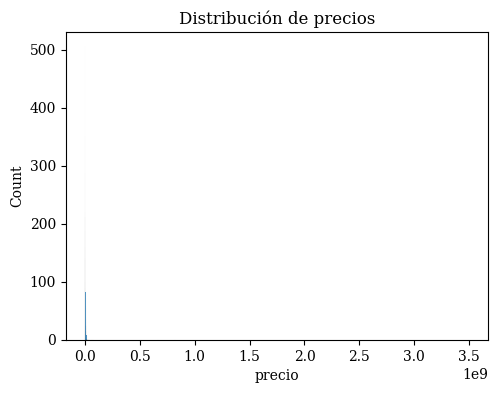

In [4]:
graficar_distribucion_histograma(data_model, 'precio', 'Distribución de precios')

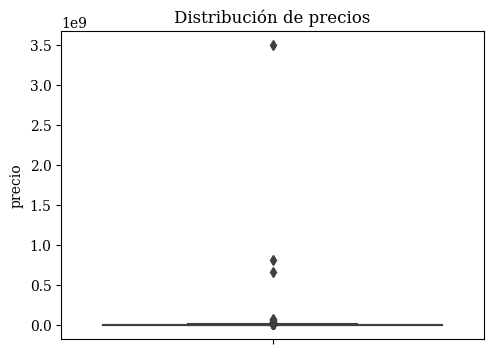

In [5]:
graficar_distribucion_boxplot(data_model, 'precio', 'Distribución de precios')

Dada la distribución observada en ambos gráficos de la variable precio es necesario hacer un tratamiento de datos atípicos, esto se hará por medio de rango intercuartil

In [6]:
iqr_atipicos = atipicos_iqr(data_model, 'precio')

Rango intercuartil para variable precio:  3200000.0
quartil 1: 1500000.0 quartil 3: 4700000.0
Límites inferiores =  -3300000.0
Límites superiores =  9500000.0


En el resultado del calculo de los límites vemos que el límite inferior es un valor negativo, esto es inconsistente para una variable precio, por tanto, por criterio experto y considerando las dinámicas de precios de arriendos en la ciudad se establece este límite en _**500000**_. Por otro lado el límite superior de precios se establece en _**9500000**_, con lo cual ,haciendo estos filtros, se obtiene la nueva distribución

In [7]:
data_model = data_model[(data_model['precio'] >= 500000) & (data_model['precio'] <= 9500000)]

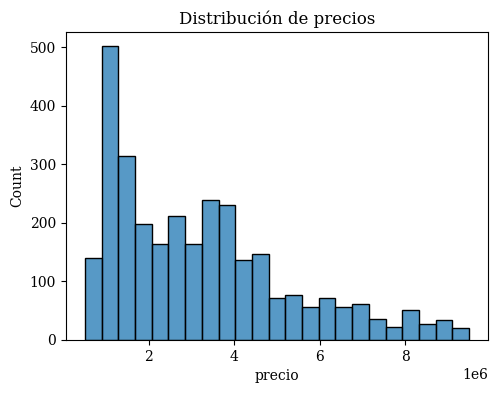

In [8]:
graficar_distribucion_histograma(data_model, 'precio', 'Distribución de precios')

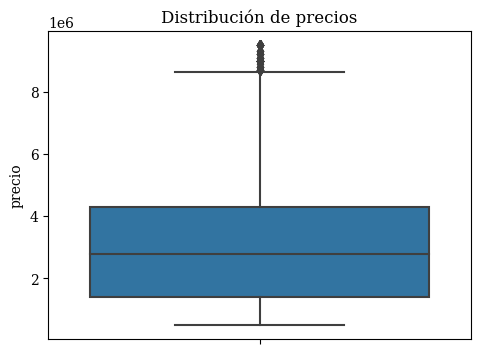

In [9]:
graficar_distribucion_boxplot(data_model, 'precio', 'Distribución de precios')

En la nueva distribucion de la variable precio se observa un sesgo hacia la izquierda para esta variable, donde puede indicar una predominancia de las casas entre 1 mm y 4 mm, se verá mas adelante si esto marca una tendencia en el funcionamiento del modelo

**División y escalado de los datos**:

Para la construcción del modelo línea base se realiza las siguientes ejecuciones:
- División de las variables predictoras y la variable objetivo.
- Estandarización de las variables predictoras
- División de los datos de entremiento y prueba en una proporcion de 75% y 25% respectivamente

In [15]:
# Variables predictoras
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

In [16]:
# Separación de las variables
X = data_model[pred_columns]
Y = data_model[['precio']]

**Estandarización***

In [17]:
X_est = estandarizar(X)
X_est.head()

,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,juegos_infantiles,balcon,zona_ropas,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,0.076923,0.165103,0.000103,0.000000,0.230769,0.000000,0.168190,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
1,0.076923,0.118199,0.000103,0.000000,0.153846,0.500000,0.122486,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092158,1.0
2,0.076923,0.058161,0.000103,0.000000,0.076923,0.666667,0.063985,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092158,1.0
3,0.076923,0.080675,0.000103,0.076923,0.153846,0.000000,0.085923,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
4,0.076923,0.159475,0.000103,0.000000,0.230769,0.333333,0.162706,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


Se obtiene unos datos de entrenamiento con las siguientes dimensiones

In [18]:
print(f"Numero de muestras: {X_est.shape[0]}, Número de columnas: {X_est.shape[1]}")

Numero de muestras: 3020, Número de columnas: 36


**Dvisión de los datos:** Entrenamiento 75%, Test 25%

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_est, Y, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (2265, 36)
Tamaño de los Datos de Validación =  (755, 36)
Tamaño del Vector de Clases de Entrenamiento =  (2265, 1)
Tamaño del Vector de Clases de Prueba =  (755, 1)


**Modelo línea base:**

Para la contrucción del modelo línea base se realiza lo siguiente:
- Regresión líneal simple sin variación de hiperparámetros
- Cálculo de importancia de variables
- Cálculo de métricas de evaluación

In [20]:
# Instancia y entrenamiento de regresión lineal
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Calculo de importancia de variables**

In [21]:
importancia = lr.coef_
importancia = pd.DataFrame(importancia[0], index=pred_columns, columns = ['precio'])
importancia_ordenada = importancia.sort_values(by = ['precio'], ascending=False)
display(importancia_ordenada)

,precio
area_total,5.827863e+06
parqueaderos,4.023632e+06
baños_familiares,3.440823e+06
area_bruta,3.054541e+06
aire_acondicionado,1.159648e+06
estrato,1.149384e+06
unidad_cerrada_conjunto,5.095780e+05
sauna,3.964196e+05
cancha_squash,3.179914e+05
gimnasio,2.885475e+05


Los coeficientes positivos indican que predicen una tendencia creciente y los coeficientes negativos indican que predicen una tendencia decreciente de la variable de salida del modelo.

Visualización de la influencia de variables en el modelo

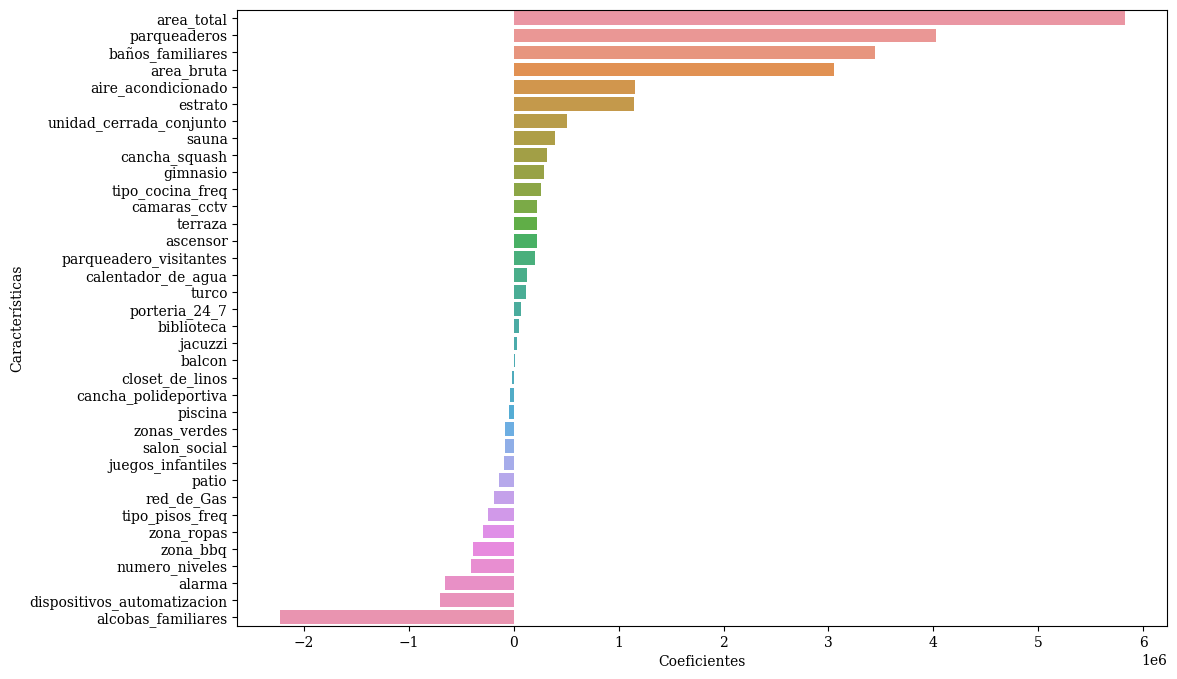

In [22]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

fig = plt.figure(figsize=(12,8))

sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

**Cálculo de metricas del modelo:**

Para el calculo de las métricas del modelo se tendran en cuenta:
- MAPE
- R2
- RMSE 

In [23]:
predicciones = lr.predict(x_test)

rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"El error RMSE  de test es: {rmse}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")


El error RMSE  de test es: 1102245.720531361
El error R2    de test es: 0.7234028359052365
El error MAPE    de test es: 0.28756251105780767


**Contrucción de nueva base de entrenamiento sin atípicos detectados por iqr:**

Esta base será utilizada en las iteraciones posteriores

In [24]:
data_model.to_csv("datos_iteracion_1.csv", index = False)

**Conclusiones:**

- La variable precio original contiene datos atípicos que afectaban la distrubición y visualización de los datos. Al aplicar una eliminación de estos se tiene una nueva base de modelado que será usada en las próximas iteraciones.
- Al ejecutar la regresión lineal la variable _area_bruta_ muestra una alta influencia en la predicción, esto es lógico en base al comportamiento del mercado pues una vivienda mas grande tiene a tener un precio mas alto.
- En esta iteración se optiene un MAPE de 0.28 y un RMSE de 1102245.72, lo cual aún esta muy alejado de las expectativas del necio. Se esperará mejorar estos en las próximas iteraciones